# Tarea 1

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


In [70]:
using Plots
using LaTeXStrings

In [40]:
function iter(F, x0, n_iters=1000)
    xn = [x0]
    for i in 1:n_iters
        push!(xn, F(xn[end]))
    end
    xn
end

iter (generic function with 2 methods)

In [84]:
F(x) = x^2 - 2

F (generic function with 1 method)

In [88]:
x0_range = [0, 0.1, 0.001, 2]
maps_range = [iter(F, x0, 10000) for x0 in x0_range];

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

In [401]:
function itera_mapeo(F, x0; n_iter=100)
    xnn = [x0]
    x = [x0]; y = [-10000.]
    for i in 1:n_iter
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    x_range = [minimum(x), maximum(x)+2]
    y_range = [minimum(y[2:end])-2, maximum(y)+2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = plot(xlim=x_range, ylim=y_range)
    plot!(xx, x -> F(x), label="F(x)")
    plot!(xx, x -> x, label="y=x")
    plot!(x, y, ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    xnn, p
end

itera_mapeo (generic function with 1 method)

In [402]:
F(x) = sqrt(x)

F (generic function with 1 method)

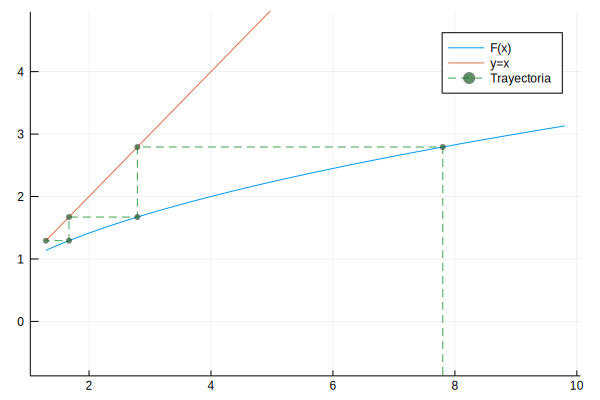

In [403]:
x0 = 10.*rand()
xnn, p = itera_mapeo(F, x0, n_iter=3)
p

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

In [404]:
include("utils.jl")

newton

In [405]:
F(x) = x^2 - 1.1

F (generic function with 1 method)

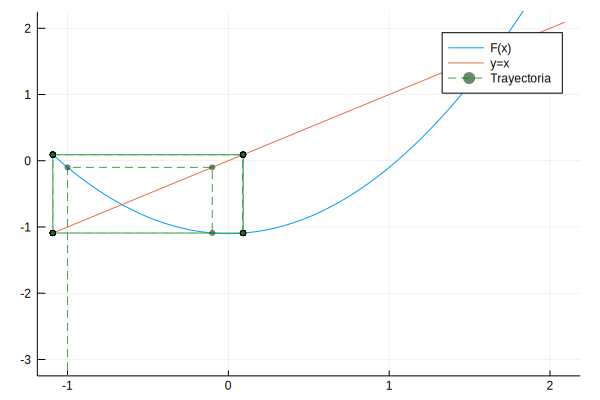

In [417]:
x0 = -1.
xnn, p = itera_mapeo(F, x0)
p

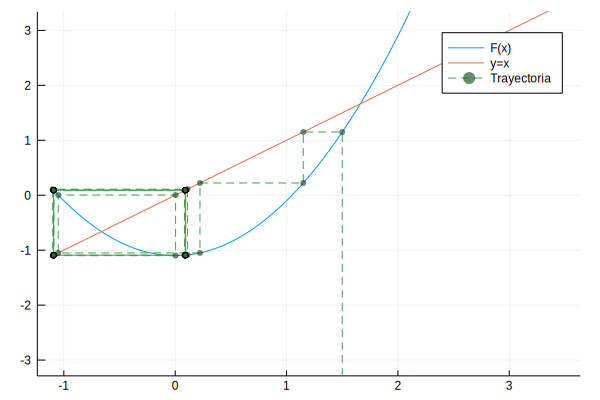

In [426]:
x0 = 1.5
xnn, p = itera_mapeo(F, x0)
p

De las figuras anteriores observamos las órbitas periódicas, estas son el "cuadrado".

In [364]:
?newton

search:



```
newton(f, f', x0, n_iter)
```

Devuelve las raíces de la función `f`.


Para esta $F$ los puntos fijos han de satisfacer
$$
F(x) = x^2 - 1.1 = x\\
\Rightarrow x^2-x-1.1 = 0
$$
Hay que emplear el método de Newton para encontrarlos, prosigamos.

In [365]:
g(x) = x^2 - x - 1.1
g′(x) = 2 * x - 1

g′ (generic function with 1 method)

In [414]:
print("Este es un punto fijo: " ,newton(g, g′, -1.3))

Este es un punto fijo: -0.6618950038622251

In [415]:
print("Este es otro punto fijo: ", newton(g, g′, 1.3))

Este es otro punto fijo: 1.661895003862225

Ya conociendo exáctamente estos puntos fijos veamos qué pasa cuando iniciamos cerca de ellos.

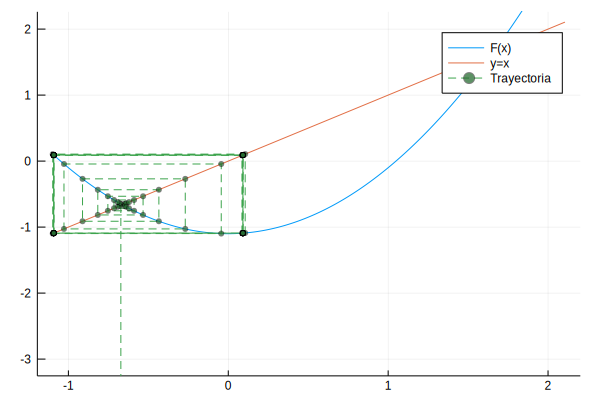

In [436]:
x0 = -0.6718950038622251
xnn, p = itera_mapeo(F, x0, n_iter=100)
p

Al parecer cuando se inicia cerca de este punto fijo la órbita se aleja de él, veamos que sucede en el otro punto.

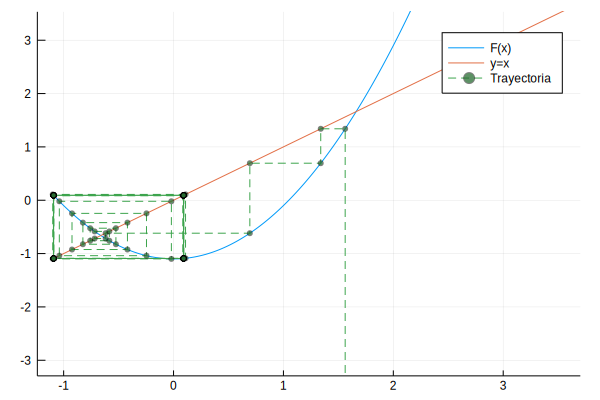

In [439]:
x0 = 1.561895003862225
xnn, p = itera_mapeo(F, x0, n_iter=100)
p

Aquí la órbita se va al mismo lugar que si se inicia en el otro punto fijo.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

In [296]:
F₁(x) = 1 / (3*x)
F₂(x) = - x^5 / 5
F₃(x) = (x / 2) - 2

F₃ (generic function with 1 method)

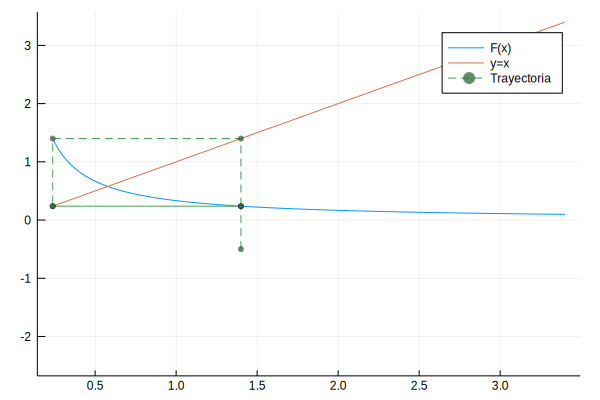

In [362]:
x0 = 1.4
xnn1, p = itera_mapeo(F₁, x0, n_iter=3)
p

## 5

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.